In [81]:
import pandas as pd
import numpy as np
import shap

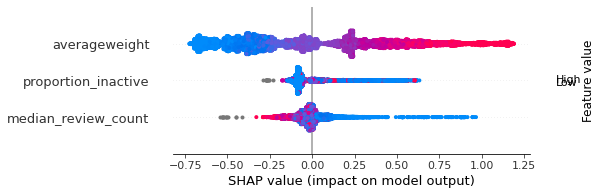

In [82]:
from aocutils.datascience import load, save
model = load('models/lightgbm.pickle')
# train an XGBoost model
data = load('models/data.pickle')
train_x, train_y, test_x, test_y = data['train_x'], data['train_y'], data['test_x'], data['test_y']
x = data['full_df'].drop('average', axis=1)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(model)
shap_values = explainer(x)
# visualize the first prediction's explanation
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, max_display=12)

In [77]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

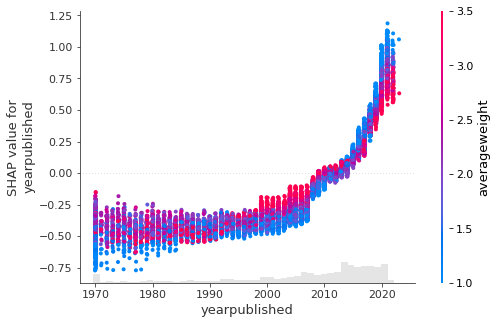

In [80]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset

shap.plots.scatter(shap_values[:,"yearpublished"], color=shap_values)

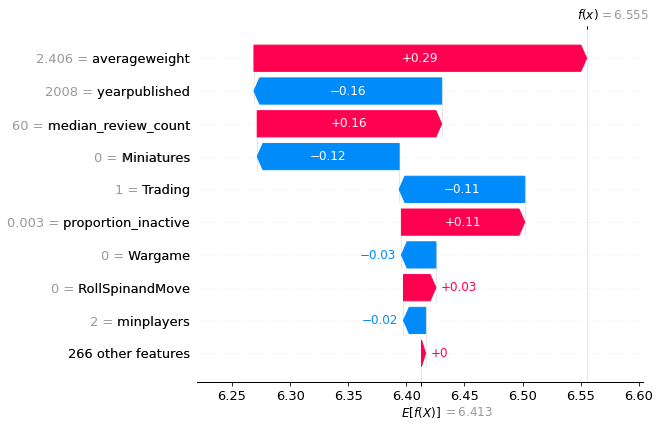

In [70]:
shap.plots.waterfall(shap_values[0])

['Arena: The Contest'] [0.18406593]
['Bruti'] [0.23232323]
['Alien: USCSS Nostromo'] [0.18587361]
['The Supershow'] [0.41393443]
['Goblin Grapple'] [0.66153846]
['Deranged'] [0.18229167]
['Mixtape Massacre'] [0.2]
['Ignite'] [0.24698795]
['Berserk: Trading Card Game'] [0.27044025]
['Arkon'] [0.26582278]
['Overlords of Infamy'] [0.20805369]
['Counter Attack'] [0.2137931]
['Outsmarted!'] [0.18110236]
['Escape The Night: The Board Game'] [0.33070866]
['The Adventure Zone: Bureau of Balance Game'] [0.464]
['Deliverance'] [0.26666667]
['Hogs of War: The Miniatures Game'] [0.55]
['The King of All Bards'] [0.23214286]
['Blood & Plunder'] [0.20588235]
['Car Wars (Sixth Edition)'] [0.19191919]
['Zaar'] [0.41836735]
['Pingyao: First Chinese Banks'] [0.21875]
['King of the Valley'] [0.20212766]
['Zoomaka'] [0.23655914]
['Clash of Armies: Medieval'] [0.23076923]
['Weird Alchemy'] [0.23333333]
['Disastles'] [0.2247191]
['Tindaya'] [0.29545455]
['Ostroleka 26 maja 1831'] [0.28915663]
['Football Cham

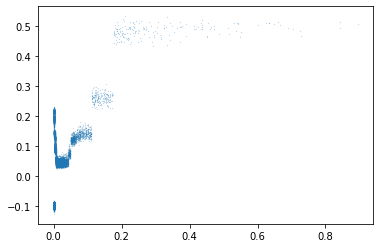

In [9]:
reviewcount = shap_values[:,'proportion_inactive'].values
import numpy as np
data = load('models/data.pickle')

cnt = 0
for i in np.argwhere(reviewcount > 0.4):
    cnt += 1
    print(data['names'][i].values, x.loc[i, 'proportion_inactive'].values)
import matplotlib.pyplot as plt
plt.scatter(x['proportion_inactive'], reviewcount, s=0.01)

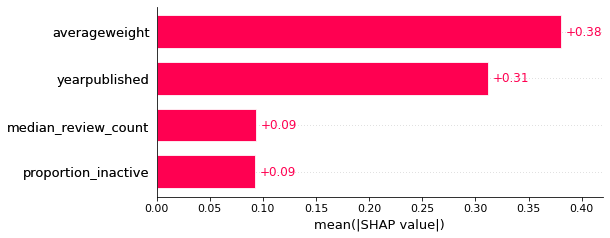

In [79]:
shap.plots.bar(shap_values)